In [57]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
from scipy import stats
from rdkit.Chem import rdMolDescriptors as rdmd
from rdkit.Chem.Scaffolds import MurckoScaffold
import pandas as pd
from tqdm import tqdm
import time
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef,confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

In [58]:
broad_data = pd.read_csv("./assaydata_270.csv") 
broad_data

,smiles,1_1,10_19,10_20,100_277,100_278,104_291,105_355,105_369,105_361,...,88_252,88_254,89_255,9_14,9_17,9_18,90_256,91_257,92_258,93_259
0,CCOC(=O)c1ccc(NC(=S)N2CCSC2c2ccc(OC)cc2)cc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,O=C(CC1NC(=O)NC1=O)Nc1cccc2ccccc12,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CC(Nc1nc(nc2ccccc12)N1CCCC1)c1ccccc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CCCC(Oc1ccc(Br)cc1)c1nc2c3cc(OC)c(OC)cc3nc(S)n2n1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CC1=C(C(NC(=O)N1)c1ccc(F)cc1)C(=O)OCc1ccc2OCOc2c1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16165,COC(=O)[C@H]1[C@H](CO)[C@H]2Cn3c(=O)c(\C=C\C)c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16166,C\C=C\c1ccc2n(C[C@H]3[C@H](CO)[C@H](N(C)[C@@H]...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16167,C\C=C\c1ccc2n(C[C@@H]3[C@@H](CO)[C@@H](N(C)[C@...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16168,C\C=C\c1ccc2n(C[C@H]3[C@H](CO)[C@@H](C(=O)N[C@...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
import pandas as pd
from rdkit.Chem import inchi
from rdkit import Chem

def make_StdInChI_from_SMILES(value):
    try: return Chem.MolToInchi(Chem.MolFromSmiles(value))
    except: return "Cannot_do"
    
from pandarallel import pandarallel
pandarallel.initialize()

broad_data['InChICode_standardised']= broad_data['smiles'].parallel_apply(make_StdInChI_from_SMILES)  

INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


RDKit WARNING: [22:28:25] WARNING: Omitted undefined stereo
RDKit WARNING: [22:28:25] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [22:28:25] WARNING: Omitted undefined stereo
RDKit WARNING: [22:28:25] WARNING: Omitted undefined stereo
RDKit WARNING: [22:28:25] WARNING: Omitted undefined stereo
RDKit WARNING: [22:28:25] WARNING: Omitted undefined stereo
RDKit WARNING: [22:28:25] WARNING: Omitted undefined stereo
RDKit WARNING: [22:28:25] WARNING: Omitted undefined stereo
RDKit WARNING: [22:28:25] WARNING: Omitted undefined stereo
RDKit WARNING: [22:28:25] WARNING: Omitted undefined stereo
RDKit WARNING: [22:28:25] WARNING: Omitted undefined stereo
RDKit WARNING: [22:28:25] WARNING: Omitted undefined stereo
RDKit WARNING: [22:28:25] WARNING: Omitted undefined stereo
RDKit WARNING: [22:28:25] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [22:28:25] WARNING: Omitted undefined stereo
RDKit WARNING: [22:28:25] WARNING: Omitted undefin

[22:28:26] RDKit WARNING: [22:28:26] WARNING: Omitted undefined stereo
RDKit WARNING: [22:28:26] WARNING: Omitted undefined stereo
RDKit WARNING: [22:28:26] WARNING: Omitted undefined stereo
RDKit WARNING: [22:28:26] WARNING: Omitted undefined stereo
RDKit WARNING: [22:28:26] WARNING: Omitted undefined stereo
RDKit WARNING: [22:28:26] WARNING: Omitted undefined stereo
RDKit WARNING: [22:28:26] WARNING: Omitted undefined stereo
RDKit WARNING: [22:28:26] WARNING: Charges were rearranged; Proton(s) added/removed; Omitted undefined stereo
RDKit WARNING: [22:28:26] WARNING: Omitted undefined stereo
RDKit WARNING: [22:28:26] WARNING: Omitted undefined stereo
RDKit WARNING: [22:28:26] WARNING: Omitted undefined stereo
RDKit WARNING: [22:28:26] WARNING: Omitted undefined stereo
RDKit WARNING: [22:28:26] WARNING: Omitted undefined stereo
RDKit WARNING: [22:28:26] WARNING: Omitted undefined stereo
RDKit WARNING: [22:28:26] WARNING: Omitted undefined stereo
RDKit WARNING: [22:28:26] WARNING: Omit

In [60]:
#import standardize smiles from the package molvs
from molvs import standardize_smiles
import pandas as pd
from rdkit.Chem import inchi
from rdkit import Chem
import cirpy

def standardized_smiles_from_inchi(value):
    #print(value)
    try: return standardize_smiles(Chem.MolToSmiles(Chem.MolFromInchi(value)))
    except: return "Cannot_do"
    

from pandarallel import pandarallel
pandarallel.initialize()
broad_data['smiles_r']=broad_data['InChICode_standardised'].parallel_apply(standardized_smiles_from_inchi)  


INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [61]:
broad_data = broad_data[broad_data["smiles_r"]!="Cannot_do"]
broad_data

,smiles,1_1,10_19,10_20,100_277,100_278,104_291,105_355,105_369,105_361,...,89_255,9_14,9_17,9_18,90_256,91_257,92_258,93_259,InChICode_standardised,smiles_r
0,CCOC(=O)c1ccc(NC(=S)N2CCSC2c2ccc(OC)cc2)cc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,InChI=1S/C20H22N2O3S2/c1-3-25-19(23)15-4-8-16(...,CCOC(=O)c1ccc(NC(=S)N2CCSC2c2ccc(OC)cc2)cc1
1,O=C(CC1NC(=O)NC1=O)Nc1cccc2ccccc12,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,InChI=1S/C15H13N3O3/c19-13(8-12-14(20)18-15(21...,OC(CC1N=C(O)N=C1O)=Nc1cccc2ccccc12
2,CC(Nc1nc(nc2ccccc12)N1CCCC1)c1ccccc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,InChI=1S/C20H22N4/c1-15(16-9-3-2-4-10-16)21-19...,CC(N=c1[nH]c(N2CCCC2)nc2ccccc12)c1ccccc1
3,CCCC(Oc1ccc(Br)cc1)c1nc2c3cc(OC)c(OC)cc3nc(S)n2n1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,InChI=1S/C21H21BrN4O3S/c1-4-5-16(29-13-8-6-12(...,CCCC(Oc1ccc(Br)cc1)c1nc2c3cc(OC)c(OC)cc3nc(S)n2n1
4,CC1=C(C(NC(=O)N1)c1ccc(F)cc1)C(=O)OCc1ccc2OCOc2c1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,InChI=1S/C20H17FN2O5/c1-11-17(18(23-20(25)22-1...,CC1=C(C(=O)OCc2ccc3c(c2)OCO3)C(c2ccc(F)cc2)NC(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16165,COC(=O)[C@H]1[C@H](CO)[C@H]2Cn3c(=O)c(\C=C\C)c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,InChI=1S/2C24H28N2O4/c2*1-3-7-17-10-11-20-21-1...,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@@H]2N(CCc2ccccc2)...
16166,C\C=C\c1ccc2n(C[C@H]3[C@H](CO)[C@H](N(C)[C@@H]...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,InChI=1S/2C28H35N3O3/c2*1-3-7-21-10-11-24-25-2...,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@H](CO)[C@@H](C(=O...
16167,C\C=C\c1ccc2n(C[C@@H]3[C@@H](CO)[C@@H](N(C)[C@...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,InChI=1S/2C28H35N3O3/c2*1-3-7-21-10-11-24-25-2...,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@@H]2N(C)[C@@H](C(...
16168,C\C=C\c1ccc2n(C[C@H]3[C@H](CO)[C@@H](C(=O)N[C@...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,InChI=1S/2C28H29N5O4/c2*1-3-7-19-10-11-23-24-2...,C/C=C/c1ccc2n(c1=O)C[C@H]1[C@H](CO)[C@@H](C(O)...


In [62]:
assay_list = broad_data.columns.to_list()[1:-2]
len(assay_list)

270

In [116]:
length = []
assay_list_filtered=[]    
df_assay_all = pd.DataFrame(columns=["InChICode_standardised"])


for assay in assay_list[:]:

    print("Assay ", assay )
    df_assay= broad_data[pd.notnull(broad_data[assay])]

    print("Total Compounds ", len(df_assay) )

    df_assay_inactive = df_assay[df_assay[assay] == 0]
    inactives_n=len(df_assay_inactive)
    print("Inactive Compounds ", inactives_n)

    df_assay_active = df_assay[df_assay[assay] == 1]
    actives_n=len(df_assay_active)
    print("Active Compounds ", actives_n)

    if(inactives_n > 3*actives_n):
        print("Inactive>Active")
        df_assay_inactive= df_assay_inactive.sample(3*actives_n, random_state=1)
        print("Inactive Compounds (after Undersamplimg) ", len(df_assay_inactive) )
        df_assay= df_assay_active.append(df_assay_inactive) 
        print("Total Compounds (after Undersamplimg) ", len(df_assay) )
        
    if(actives_n > 3*inactives_n):
        print("Active>Inactive")
        df_assay_active= df_assay_active.sample(3*inactives_n, random_state=1)
        print("Inactive Compounds (after Undersamplimg) ", len(df_assay_active) )
        df_assay= df_assay_inactive.append(df_assay_active) 
        print("Total Compounds (after Undersamplimg) ", len(df_assay) )
        
    else:
        print("No Undersamplimg; Assay already in 1:3 ratio or less", len(df_assay) )

    if(len(df_assay)<100):
        print("Not Selected")
        
    if(len(df_assay)>=100):
        print("Selected")
        assay_list_filtered.append(assay)
        df_assay_all = pd.merge(df_assay_all, df_assay[["InChICode_standardised", assay]], on="InChICode_standardised", how="outer")
        
    length.append(len(df_assay))
    
    
    
    
    

Assay  1_1
Total Compounds  100
Inactive Compounds  98
Active Compounds  2
Inactive>Active
Inactive Compounds (after Undersamplimg)  6
Total Compounds (after Undersamplimg)  8
No Undersamplimg; Assay already in 1:3 ratio or less 8
Not Selected
Assay  10_19
Total Compounds  77
Inactive Compounds  75
Active Compounds  2
Inactive>Active
Inactive Compounds (after Undersamplimg)  6
Total Compounds (after Undersamplimg)  8
No Undersamplimg; Assay already in 1:3 ratio or less 8
Not Selected
Assay  10_20
Total Compounds  64
Inactive Compounds  61
Active Compounds  3
Inactive>Active
Inactive Compounds (after Undersamplimg)  9
Total Compounds (after Undersamplimg)  12
No Undersamplimg; Assay already in 1:3 ratio or less 12
Not Selected
Assay  100_277
Total Compounds  43
Inactive Compounds  34
Active Compounds  9
Inactive>Active
Inactive Compounds (after Undersamplimg)  27
Total Compounds (after Undersamplimg)  36
No Undersamplimg; Assay already in 1:3 ratio or less 36
Not Selected
Assay  100_278

No Undersamplimg; Assay already in 1:3 ratio or less 62
Not Selected
Assay  143_495
Total Compounds  74
Inactive Compounds  60
Active Compounds  14
Inactive>Active
Inactive Compounds (after Undersamplimg)  42
Total Compounds (after Undersamplimg)  56
No Undersamplimg; Assay already in 1:3 ratio or less 56
Not Selected
Assay  145_497
Total Compounds  35
Inactive Compounds  31
Active Compounds  4
Inactive>Active
Inactive Compounds (after Undersamplimg)  12
Total Compounds (after Undersamplimg)  16
No Undersamplimg; Assay already in 1:3 ratio or less 16
Not Selected
Assay  15_26
Total Compounds  62
Inactive Compounds  56
Active Compounds  6
Inactive>Active
Inactive Compounds (after Undersamplimg)  18
Total Compounds (after Undersamplimg)  24
No Undersamplimg; Assay already in 1:3 ratio or less 24
Not Selected
Assay  153_510
Total Compounds  41
Inactive Compounds  39
Active Compounds  2
Inactive>Active
Inactive Compounds (after Undersamplimg)  6
Total Compounds (after Undersamplimg)  8
No 

Total Compounds (after Undersamplimg)  184
No Undersamplimg; Assay already in 1:3 ratio or less 184
Selected
Assay  191_631
Total Compounds  2764
Inactive Compounds  2723
Active Compounds  41
Inactive>Active
Inactive Compounds (after Undersamplimg)  123
Total Compounds (after Undersamplimg)  164
No Undersamplimg; Assay already in 1:3 ratio or less 164
Selected
Assay  191_675
Total Compounds  1072
Inactive Compounds  1063
Active Compounds  9
Inactive>Active
Inactive Compounds (after Undersamplimg)  27
Total Compounds (after Undersamplimg)  36
No Undersamplimg; Assay already in 1:3 ratio or less 36
Not Selected
Assay  192_635
Total Compounds  71
Inactive Compounds  64
Active Compounds  7
Inactive>Active
Inactive Compounds (after Undersamplimg)  21
Total Compounds (after Undersamplimg)  28
No Undersamplimg; Assay already in 1:3 ratio or less 28
Not Selected
Assay  193_723
Total Compounds  947
Inactive Compounds  897
Active Compounds  50
Inactive>Active
Inactive Compounds (after Undersampl

Total Compounds  15337
Inactive Compounds  14906
Active Compounds  431
Inactive>Active
Inactive Compounds (after Undersamplimg)  1293
Total Compounds (after Undersamplimg)  1724
No Undersamplimg; Assay already in 1:3 ratio or less 1724
Selected
Assay  223_695
Total Compounds  1914
Inactive Compounds  1882
Active Compounds  32
Inactive>Active
Inactive Compounds (after Undersamplimg)  96
Total Compounds (after Undersamplimg)  128
No Undersamplimg; Assay already in 1:3 ratio or less 128
Selected
Assay  224_696
Total Compounds  2232
Inactive Compounds  2133
Active Compounds  99
Inactive>Active
Inactive Compounds (after Undersamplimg)  297
Total Compounds (after Undersamplimg)  396
No Undersamplimg; Assay already in 1:3 ratio or less 396
Selected
Assay  225_697
Total Compounds  1811
Inactive Compounds  1798
Active Compounds  13
Inactive>Active
Inactive Compounds (after Undersamplimg)  39
Total Compounds (after Undersamplimg)  52
No Undersamplimg; Assay already in 1:3 ratio or less 52
Not Se

Total Compounds  4608
Inactive Compounds  4334
Active Compounds  274
Inactive>Active
Inactive Compounds (after Undersamplimg)  822
Total Compounds (after Undersamplimg)  1096
No Undersamplimg; Assay already in 1:3 ratio or less 1096
Selected
Assay  262_740
Total Compounds  2058
Inactive Compounds  2014
Active Compounds  44
Inactive>Active
Inactive Compounds (after Undersamplimg)  132
Total Compounds (after Undersamplimg)  176
No Undersamplimg; Assay already in 1:3 ratio or less 176
Selected
Assay  263_741
Total Compounds  1910
Inactive Compounds  1775
Active Compounds  135
Inactive>Active
Inactive Compounds (after Undersamplimg)  405
Total Compounds (after Undersamplimg)  540
No Undersamplimg; Assay already in 1:3 ratio or less 540
Selected
Assay  264_742
Total Compounds  14495
Inactive Compounds  14458
Active Compounds  37
Inactive>Active
Inactive Compounds (after Undersamplimg)  111
Total Compounds (after Undersamplimg)  148
No Undersamplimg; Assay already in 1:3 ratio or less 148
Se

In [117]:
df_assay_all

,InChICode_standardised,178_684,180_686,183_604,184_606,185_665,185_666,186_668,190_628,190_629,...,273_751,274_752,275_753,275_754,276_755,278_757,279_758,280_759,283_762,93_259
0,InChI=1S/C20H29NO5S/c1-13-5-3-4-6-14(2)9-18(22...,1.0,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,InChI=1S/C22H26N2O3/c1-25-20-9-5-18(6-10-20)4-...,1.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,InChI=1S/C10H12ClN5O3/c11-10-14-8(12)7-9(15-10...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,InChI=1S/C31H39F3N4O5/c1-19-16-38(20(2)18-39)2...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,InChI=1S/C36H40N4O4/c1-25-21-40(26(2)24-41)35(...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15267,InChI=1S/C29H42O10/c1-15-22(32)23(33)24(34)25(...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
15268,InChI=1S/C9H11N3O4/c10-5-1-2-12-8-7(16-9(12)11...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
15269,InChI=1S/C22H22O8/c1-25-14-5-10(6-15(26-2)20(1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
15270,"InChI=1S/C40H71NO14/c1-15-27-40(11,48)33(44)22...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [121]:
assay_data_filtered=df_assay_all
assay_data_filtered['smiles_r']=df_assay_all['InChICode_standardised'].parallel_apply(standardized_smiles_from_inchi)  
assay_data_filtered

,InChICode_standardised,178_684,180_686,183_604,184_606,185_665,185_666,186_668,190_628,190_629,...,274_752,275_753,275_754,276_755,278_757,279_758,280_759,283_762,93_259,smiles_r
0,InChI=1S/C20H29NO5S/c1-13-5-3-4-6-14(2)9-18(22...,1.0,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C/C1=C/C(=O)O[C@@H]2C[C@@H](CC[C@H](C)/C=C\CC1...
1,InChI=1S/C22H26N2O3/c1-25-20-9-5-18(6-10-20)4-...,1.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,COc1ccc(CCCOC(Cn2ccnc2)c2ccc(OC)cc2)cc1
2,InChI=1S/C10H12ClN5O3/c11-10-14-8(12)7-9(15-10...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Nc1nc(Cl)nc2c1ncn2C1C[C@@H](O)C(CO)O1
3,InChI=1S/C31H39F3N4O5/c1-19-16-38(20(2)18-39)2...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,C[C@H]1CN([C@H](C)CO)C(=O)c2cc(N=C(O)C3CCCCC3)...
4,InChI=1S/C36H40N4O4/c1-25-21-40(26(2)24-41)35(...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C[C@H]1CN([C@@H](C)CO)C(=O)Cc2cc(N=C(O)c3ccncc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15267,InChI=1S/C29H42O10/c1-15-22(32)23(33)24(34)25(...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,C[C@@H]1O[C@@H](O[C@H]2CC[C@]3(C=O)C4CC[C@]5(C...
15268,InChI=1S/C9H11N3O4/c10-5-1-2-12-8-7(16-9(12)11...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,N=c1ccn2c(n1)O[C@@H]1C2O[C@H](CO)[C@H]1O
15269,InChI=1S/C22H22O8/c1-25-14-5-10(6-15(26-2)20(1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,COc1cc([C@@H]2c3cc4c(c(O)c3C[C@H]3COC(=O)[C@@H...
15270,"InChI=1S/C40H71NO14/c1-15-27-40(11,48)33(44)22...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,CCC(=O)O[C@H]1[C@H](O[C@@H]2[C@@H](C)[C@H](O[C...


In [122]:
assay_data_filtered.to_csv("assay_data_filtered_89_inchi.csv", index=False)

In [123]:
not_to_be_selected_list=["Nuclei_Correlation_Manders_AGP_DNA",
            "Nuclei_Correlation_Manders_AGP_ER",
            "Nuclei_Correlation_Manders_AGP_Mito",
            "Nuclei_Correlation_Manders_AGP_RNA",
            "Nuclei_Correlation_Manders_DNA_AGP",
            "Nuclei_Correlation_Manders_DNA_ER",
            "Nuclei_Correlation_Manders_DNA_Mito",
            "Nuclei_Correlation_Manders_DNA_RNA",
            "Nuclei_Correlation_Manders_ER_AGP",
            "Nuclei_Correlation_Manders_ER_DNA",
            "Nuclei_Correlation_Manders_ER_Mito",
            "Nuclei_Correlation_Manders_ER_RNA",
            "Nuclei_Correlation_Manders_Mito_AGP",
            "Nuclei_Correlation_Manders_Mito_DNA",
            "Nuclei_Correlation_Manders_Mito_ER",
            "Nuclei_Correlation_Manders_Mito_RNA",
            "Nuclei_Correlation_Manders_RNA_AGP",
            "Nuclei_Correlation_Manders_RNA_DNA",
            "Nuclei_Correlation_Manders_RNA_ER",
            "Nuclei_Correlation_Manders_RNA_Mito",
            "Nuclei_Correlation_RWC_AGP_DNA",
            "Nuclei_Correlation_RWC_AGP_ER",
            "Nuclei_Correlation_RWC_AGP_Mito",
            "Nuclei_Correlation_RWC_AGP_RNA",
            "Nuclei_Correlation_RWC_DNA_AGP",
            "Nuclei_Correlation_RWC_DNA_ER",
            "Nuclei_Correlation_RWC_DNA_Mito",
            "Nuclei_Correlation_RWC_DNA_RNA",
            "Nuclei_Correlation_RWC_ER_AGP",
            "Nuclei_Correlation_RWC_ER_DNA",
            "Nuclei_Correlation_RWC_ER_Mito",
            "Nuclei_Correlation_RWC_ER_RNA",
            "Nuclei_Correlation_RWC_Mito_AGP",
            "Nuclei_Correlation_RWC_Mito_DNA",
            "Nuclei_Correlation_RWC_Mito_ER",
            "Nuclei_Correlation_RWC_Mito_RNA",
            "Nuclei_Correlation_RWC_RNA_AGP",
            "Nuclei_Correlation_RWC_RNA_DNA",
            "Nuclei_Correlation_RWC_RNA_ER",
            "Nuclei_Correlation_RWC_RNA_Mito",
            "Nuclei_Granularity_14_AGP",
            "Nuclei_Granularity_14_DNA",
            "Nuclei_Granularity_14_ER",
            "Nuclei_Granularity_14_Mito",
            "Nuclei_Granularity_14_RNA",
            "Nuclei_Granularity_15_AGP",
            "Nuclei_Granularity_15_DNA",
            "Nuclei_Granularity_15_ER",
            "Nuclei_Granularity_15_Mito",
            "Nuclei_Granularity_15_RNA",
            "Nuclei_Granularity_16_AGP",
            "Nuclei_Granularity_16_DNA",
            "Nuclei_Granularity_16_ER",
            "Nuclei_Granularity_16_Mito",
            "Nuclei_Granularity_16_RNA"]

In [124]:
cp = pd.read_csv("./../../../Mitochondrial_Toxicity/Cell_Painting_Median_Features_Median_doses.csv" , usecols=lambda x: x not in not_to_be_selected_list) 
cp=cp.drop('index', axis=1)
cp

,InChICode_standardised,Metadata_mmoles_per_liter,Cells_AreaShape_Area,Cells_AreaShape_Center_X,Cells_AreaShape_Center_Y,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_EulerNumber,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,...,Nuclei_Texture_Variance_DNA_5_0,Nuclei_Texture_Variance_ER_10_0,Nuclei_Texture_Variance_ER_3_0,Nuclei_Texture_Variance_ER_5_0,Nuclei_Texture_Variance_Mito_10_0,Nuclei_Texture_Variance_Mito_3_0,Nuclei_Texture_Variance_Mito_5_0,Nuclei_Texture_Variance_RNA_10_0,Nuclei_Texture_Variance_RNA_3_0,Nuclei_Texture_Variance_RNA_5_0
0,InChI=1S/C12H15N3O2S/c1-7(2)18-8-4-5-9-10(6-8)...,5.000000,1728.953125,-1.375000,-25.445312,-0.067918,-0.062396,0.0,0.026443,0.038767,...,-0.218573,0.314918,0.222859,0.280258,0.192997,0.144917,0.168085,-0.332871,-0.314733,-0.313477
1,InChI=1S/C12H18N4O3/c1-7(2)5-16-10-9(11(17)15(...,5.000000,-272.074219,11.464844,-1.628906,-0.001808,-0.006674,0.0,-0.001405,-0.008796,...,-0.135188,0.023860,-0.016903,-0.017773,-0.028029,-0.038308,-0.041455,-0.070389,-0.067789,-0.071673
2,InChI=1S/C16H29N5O3/c1-12-9-20(13(2)10-22)16(2...,4.973595,101.958984,15.673828,-2.314453,0.010687,0.013397,0.0,-0.003746,0.010680,...,0.015253,-0.014119,0.035703,0.016875,-0.039304,-0.070028,-0.062892,-0.015647,-0.038908,-0.026464
3,InChI=1S/C16H29N5O3/c1-12-9-20(13(2)10-22)16(2...,4.912934,-109.708984,-10.203125,1.718750,0.025025,0.014627,0.0,-0.007164,-0.005632,...,-0.040388,0.046218,0.031759,0.037029,-0.051411,-0.083061,-0.071562,-0.024598,-0.052021,-0.043327
4,InChI=1S/C16H29N5O3/c1-12-9-20(13(2)10-22)16(2...,5.012874,-234.222656,8.873047,3.308594,0.010192,0.005251,0.0,-0.003173,0.005312,...,0.041850,-0.072889,-0.030955,-0.037623,-0.009460,0.004604,-0.010465,-0.031869,-0.025910,-0.014907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30399,InChI=1S/C9H9N5OS2/c10-12-8(16)11-6-3-1-2-5(4-...,5.000000,-226.027344,-18.847656,-0.511719,-0.005827,0.004864,0.0,0.003590,0.010464,...,-0.201503,-0.114357,-0.123664,-0.127474,-0.069665,-0.056972,-0.044186,-0.019668,-0.091541,-0.062515
30400,InChI=1S/C9H9NO/c11-6-7-5-10-9-4-2-1-3-8(7)9/h...,5.000000,254.769531,18.886719,-3.589844,0.027814,0.016943,0.0,-0.000781,-0.000637,...,-0.069652,-0.079942,-0.018155,-0.017759,-0.118369,-0.046322,-0.023926,0.033498,0.051214,0.016060
30401,InChI=1S/C9H9NO2/c10-8-3-1-2-7(6-8)4-5-9(11)12...,5.000000,238.574219,-0.699219,6.625000,0.005228,0.008800,0.0,0.002336,0.013308,...,0.042933,-0.107812,-0.107077,-0.138399,0.168811,0.216703,0.195851,-0.063656,-0.042877,-0.071681
30402,InChI=1S/C9H9NO3S/c1-6(11)5-14-8-3-2-7(4-10-8)...,5.000000,-238.945312,5.476562,0.089844,0.018032,0.012711,0.0,-0.004635,0.006730,...,0.081551,-0.070647,-0.095379,-0.102060,0.023423,0.049321,0.041996,0.023470,0.058959,0.065934


In [125]:
data = pd.merge(assay_data_filtered, cp )
data.to_csv("broad_data_filtered_89_CP.csv", index=False)

In [127]:
data

,InChICode_standardised,178_684,180_686,183_604,184_606,185_665,185_666,186_668,190_628,190_629,...,Nuclei_Texture_Variance_DNA_5_0,Nuclei_Texture_Variance_ER_10_0,Nuclei_Texture_Variance_ER_3_0,Nuclei_Texture_Variance_ER_5_0,Nuclei_Texture_Variance_Mito_10_0,Nuclei_Texture_Variance_Mito_3_0,Nuclei_Texture_Variance_Mito_5_0,Nuclei_Texture_Variance_RNA_10_0,Nuclei_Texture_Variance_RNA_3_0,Nuclei_Texture_Variance_RNA_5_0
0,InChI=1S/C20H29NO5S/c1-13-5-3-4-6-14(2)9-18(22...,1.0,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,...,0.093061,0.875722,0.850884,0.839612,0.060316,0.070135,-0.000190,-0.108497,0.085898,0.019391
1,InChI=1S/C22H26N2O3/c1-25-20-9-5-18(6-10-20)4-...,1.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,...,0.116051,0.309519,0.459790,0.401589,0.146067,0.214701,0.213238,-0.135633,-0.014985,-0.017021
2,InChI=1S/C10H12ClN5O3/c11-10-14-8(12)7-9(15-10...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,...,-0.294291,0.209528,0.335144,0.237102,0.384470,0.352664,0.347354,0.242193,0.061739,0.146235
3,InChI=1S/C31H39F3N4O5/c1-19-16-38(20(2)18-39)2...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,0.039152,0.086286,0.054990,0.058714,-0.083360,-0.105019,-0.094897,0.011623,0.013888,0.011693
4,InChI=1S/C36H40N4O4/c1-25-21-40(26(2)24-41)35(...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,0.040428,-0.028181,0.000753,-0.000458,-0.188926,-0.189808,-0.198777,-0.048785,-0.000681,0.028151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15267,InChI=1S/C29H42O10/c1-15-22(32)23(33)24(34)25(...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.023354,1.082932,1.488213,1.506465,0.892884,1.265802,1.439872,1.190745,1.632206,1.749445
15268,InChI=1S/C9H11N3O4/c10-5-1-2-12-8-7(16-9(12)11...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.896843,-0.071896,-0.125941,-0.123960,-0.108458,-0.124955,-0.128173,0.260039,0.046118,0.070403
15269,InChI=1S/C22H22O8/c1-25-14-5-10(6-15(26-2)20(1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.572008,0.493553,0.644446,0.648428,0.230773,0.502751,0.490447,0.175383,0.332650,0.245685
15270,"InChI=1S/C40H71NO14/c1-15-27-40(11,48)33(44)22...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.164852,-0.096224,-0.086212,-0.069431,-0.132107,-0.102662,-0.102206,0.046411,0.032759,0.056227


In [128]:
CP_features_list= cp.columns.to_list()[2:]
assay_list= broad_data_filtered.columns.to_list()[2:]

In [129]:
len(assay_list)

89

In [130]:
def fp_as_DataStructs(mol):
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
    #arr = np.zeros((1,), np.int)
    #DataStructs.ConvertToNumpyArray(fp, arr)
    return fp

mol_list = [Chem.MolFromSmiles(x) for x in broad_data_filtered.smiles_r]
broad_data_filtered['Mol'] = mol_list
broad_data_filtered['fp'] = [fp_as_DataStructs(x) for x in broad_data_filtered.Mol]
broad_data_filtered

,InChICode_standardised,178_684,180_686,183_604,184_606,185_665,185_666,186_668,190_628,190_629,...,275_754,276_755,278_757,279_758,280_759,283_762,93_259,smiles_r,Mol,fp
0,InChI=1S/C20H29NO5S/c1-13-5-3-4-6-14(2)9-18(22...,1.0,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C/C1=C/C(=O)O[C@@H]2C[C@@H](CC[C@H](C)/C=C\CC1...,<rdkit.Chem.rdchem.Mol object at 0x2b9340876460>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,InChI=1S/C22H26N2O3/c1-25-20-9-5-18(6-10-20)4-...,1.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,COc1ccc(CCCOC(Cn2ccnc2)c2ccc(OC)cc2)cc1,<rdkit.Chem.rdchem.Mol object at 0x2b92df2cfbe0>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
2,InChI=1S/C10H12ClN5O3/c11-10-14-8(12)7-9(15-10...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Nc1nc(Cl)nc2c1ncn2C1C[C@@H](O)C(CO)O1,<rdkit.Chem.rdchem.Mol object at 0x2b92df2cf880>,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,InChI=1S/C31H39F3N4O5/c1-19-16-38(20(2)18-39)2...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,C[C@H]1CN([C@H](C)CO)C(=O)c2cc(N=C(O)C3CCCCC3)...,<rdkit.Chem.rdchem.Mol object at 0x2b942fec1520>,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,InChI=1S/C36H40N4O4/c1-25-21-40(26(2)24-41)35(...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C[C@H]1CN([C@@H](C)CO)C(=O)Cc2cc(N=C(O)c3ccncc...,<rdkit.Chem.rdchem.Mol object at 0x2b9414488a00>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15267,InChI=1S/C29H42O10/c1-15-22(32)23(33)24(34)25(...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,C[C@@H]1O[C@@H](O[C@H]2CC[C@]3(C=O)C4CC[C@]5(C...,<rdkit.Chem.rdchem.Mol object at 0x2b942117bac0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
15268,InChI=1S/C9H11N3O4/c10-5-1-2-12-8-7(16-9(12)11...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,N=c1ccn2c(n1)O[C@@H]1C2O[C@H](CO)[C@H]1O,<rdkit.Chem.rdchem.Mol object at 0x2b942117bb20>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
15269,InChI=1S/C22H22O8/c1-25-14-5-10(6-15(26-2)20(1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,COc1cc([C@@H]2c3cc4c(c(O)c3C[C@H]3COC(=O)[C@@H...,<rdkit.Chem.rdchem.Mol object at 0x2b942117bb80>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
15270,"InChI=1S/C40H71NO14/c1-15-27-40(11,48)33(44)22...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,CCC(=O)O[C@H]1[C@H](O[C@@H]2[C@@H](C)[C@H](O[C...,<rdkit.Chem.rdchem.Mol object at 0x2b942117bbe0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [131]:
broad_data_compounds= broad_data_filtered[["smiles_r", "InChICode_standardised"]]
Ser_Mol = broad_data_compounds['smiles_r'].apply(Chem.MolFromSmiles)

In [132]:
from rdkit.Chem.rdMolDescriptors import GetMorganFingerprintAsBitVect

Morgan_fingerprint = Ser_Mol.apply(GetMorganFingerprintAsBitVect, args=(2, 2048))
Morganfingerprint_array  = np.stack(Morgan_fingerprint)

Morgan_collection  = []
for x in np.arange(Morganfingerprint_array.shape[1]): #np.arange plus rapide que range
    x = "Mfp"+str(x)
    Morgan_collection.append(x)

Morganfingerprint_table  = pd.DataFrame(Morganfingerprint_array , columns=Morgan_collection )
Morganfingerprint_table ['InChICode_standardised'] = broad_data_compounds['InChICode_standardised']

In [133]:
Morganfingerprint_table

,Mfp0,Mfp1,Mfp2,Mfp3,Mfp4,Mfp5,Mfp6,Mfp7,Mfp8,Mfp9,...,Mfp2039,Mfp2040,Mfp2041,Mfp2042,Mfp2043,Mfp2044,Mfp2045,Mfp2046,Mfp2047,InChICode_standardised
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,InChI=1S/C20H29NO5S/c1-13-5-3-4-6-14(2)9-18(22...
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,InChI=1S/C22H26N2O3/c1-25-20-9-5-18(6-10-20)4-...
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,InChI=1S/C10H12ClN5O3/c11-10-14-8(12)7-9(15-10...
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,InChI=1S/C31H39F3N4O5/c1-19-16-38(20(2)18-39)2...
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,InChI=1S/C36H40N4O4/c1-25-21-40(26(2)24-41)35(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,InChI=1S/C29H42O10/c1-15-22(32)23(33)24(34)25(...
15268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,InChI=1S/C9H11N3O4/c10-5-1-2-12-8-7(16-9(12)11...
15269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,InChI=1S/C22H22O8/c1-25-14-5-10(6-15(26-2)20(1...
15270,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"InChI=1S/C40H71NO14/c1-15-27-40(11,48)33(44)22..."


In [134]:
Morganfingerprint_table.to_csv("Mfp_all_bits_15272.csv", index=False)

In [135]:
from matplotlib import pyplot as plt

In [136]:
Morganfingerprint_table.iloc[:, :-1].T.sum()

0        57
1        43
2        44
3        78
4        74
         ..
15267    67
15268    38
15269    52
15270    81
15271    31
Length: 15272, dtype: int64

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


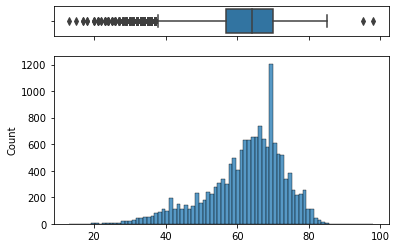

In [137]:
#Number of bits set per molecule
import seaborn as sns

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(Morganfingerprint_table.iloc[:, :-1].T.sum(), ax=ax_box)
sns.histplot(Morganfingerprint_table.iloc[:, :-1].T.sum(), ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

In [138]:
Morganfingerprint_table.iloc[:, :-1].sum().sort_values(ascending=False)

Mfp1873    14956
Mfp1380    14918
Mfp807     14414
Mfp1750    14236
Mfp1019    13725
           ...  
Mfp1579        1
Mfp1748        1
Mfp1115        0
Mfp1789        0
Mfp337         0
Length: 2048, dtype: int64

In [139]:
bits = bits= list(range(0, 2048, 1))
bits[-1]

2047

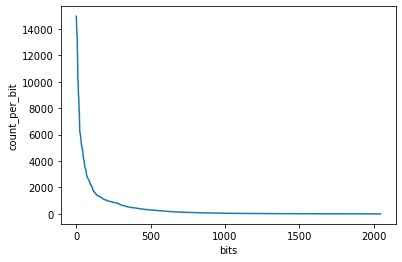

In [140]:
#Number of times each individual bit is set
#Number of bits set per molecule
import seaborn as sns

count_per_bit = Morganfingerprint_table.iloc[:, :-1].sum().sort_values(ascending=False).values
bits = bits= list(range(0, 2048, 1))

#create dataframe using two list days and temperature
bit_counts_df = pd.DataFrame({"count_per_bit":count_per_bit, "bits":bits})
 
# Draw line plot
sns.lineplot(y = "count_per_bit", x = "bits", data=bit_counts_df,)
plt.show() # to show graph



In [141]:
from sklearn.feature_selection import VarianceThreshold
from itertools import compress

def fs_variance(df, threshold:float=0.05):
    """
    Return a list of selected variables based on the threshold.
    """

    # The list of columns in the data frame
    features = list(df.columns)
    
    # Initialize and fit the method
    vt = VarianceThreshold(threshold = threshold)
    _ = vt.fit(df)
    
    # Get which column names which pass the threshold
    feat_select = list(compress(features, vt.get_support()))
    
    return feat_select

In [142]:
selected_Features = fs_variance(Morganfingerprint_table.iloc[:,:-1], threshold=0.05)

In [143]:
len(selected_Features)

277

In [144]:
new_Morganfingerprint_table= Morganfingerprint_table[selected_Features]

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


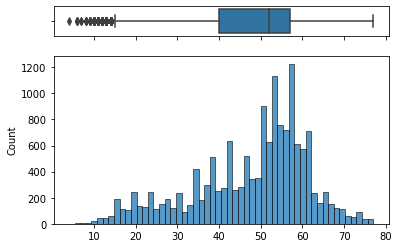

In [145]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(new_Morganfingerprint_table.iloc[:, :-1].T.sum(), ax=ax_box)
sns.histplot(new_Morganfingerprint_table.iloc[:, :-1].T.sum(), ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

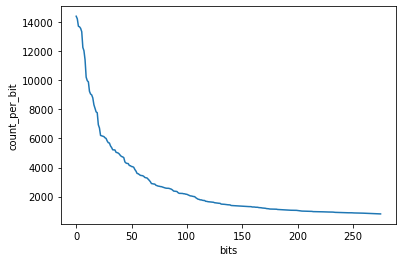

In [146]:
count_per_bit = new_Morganfingerprint_table.iloc[:, :-1].sum().sort_values(ascending=False).values
bits = bits= list(range(0, len(count_per_bit), 1))

#create dataframe using two list days and temperature
bit_counts_df = pd.DataFrame({"count_per_bit":count_per_bit, "bits":bits})
 
# Draw line plot
sns.lineplot(y = "count_per_bit", x = "bits", data=bit_counts_df,)
plt.show() # to show graph



In [147]:
new_Morganfingerprint_table["InChICode_standardised"]= Morganfingerprint_table["InChICode_standardised"]
new_Morganfingerprint_table

/home/ss2686/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Mfp1,Mfp2,Mfp12,Mfp14,Mfp16,Mfp25,Mfp29,Mfp66,Mfp80,Mfp90,...,Mfp1953,Mfp1978,Mfp1980,Mfp1985,Mfp2004,Mfp2009,Mfp2022,Mfp2040,Mfp2045,InChICode_standardised
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,InChI=1S/C20H29NO5S/c1-13-5-3-4-6-14(2)9-18(22...
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,InChI=1S/C22H26N2O3/c1-25-20-9-5-18(6-10-20)4-...
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,InChI=1S/C10H12ClN5O3/c11-10-14-8(12)7-9(15-10...
3,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,InChI=1S/C31H39F3N4O5/c1-19-16-38(20(2)18-39)2...
4,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,InChI=1S/C36H40N4O4/c1-25-21-40(26(2)24-41)35(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,InChI=1S/C29H42O10/c1-15-22(32)23(33)24(34)25(...
15268,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,InChI=1S/C9H11N3O4/c10-5-1-2-12-8-7(16-9(12)11...
15269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,InChI=1S/C22H22O8/c1-25-14-5-10(6-15(26-2)20(1...
15270,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,"InChI=1S/C40H71NO14/c1-15-27-40(11,48)33(44)22..."


In [148]:
new_Morganfingerprint_table.to_csv("Mfp_filtered_15272.csv", index=False)